
focused.csv.gz and focused.T.csv.gz are rounded to 1000.


In [1]:
import pandas as pd

In [2]:
print(pd.__version__)

1.1.5


In [3]:
import matplotlib.pyplot as plt

In [4]:
# Adjust plot size
#options(repr.plot.width=16, repr.plot.height=6)

# For some reason, if this is in the same cell as the import command, it doesn't work.
plt.rcParams["figure.figsize"] = [18.0,8.0]

In [5]:
import numpy as np

# Read raw data

In [6]:
df=pd.read_csv("focused.csv.gz",header=[0,1,2,3],index_col=[0,1])
df.columns.names=['sample','pup','hkle','q']

In [7]:
df.head()

sample              02-2483-01A                                      \
pup                      paired                                       
hkle                   HERVK113 SVA_A SVA_B SVA_C SVA_D SVA_E SVA_F   
q                           Q20   Q20   Q20   Q20   Q20   Q20   Q20   
chromosome position                                                   
chr1       1048000            0     0     0     0     0     0     0   
           1190000            0     0     0     0     0     0     0   
           1308000            0     0     0     0     0     0     0   
           1409000            4     0     0     0     0     0     0   
           1410000            1     0     0     0     0     0     0   

sample              02-2483-10A              ... TQ-A8XE-02A              \
pup                      paired              ...      paired               
hkle                   HERVK113 SVA_A SVA_B  ...       SVA_D SVA_E SVA_F   
q                           Q20   Q20   Q20  ...         Q20   Q20   Q20   
chromosome position                          ...                           
chr1       1048000            0     0     0  ...           0     0     0   
           1190000            0     0     0  ...           0     0     0   
           1308000            0     0     0  ...           0     0     0   
           1409000            2     0     0  ...           0     0     0   
           1410000            3     0     0  ...           0     0     0   

sample              TQ-A8XE-10A                                      
pup                      paired                                      
hkle                   HERVK113 SVA_A SVA_B SVA_C SVA_D SVA_E SVA_F  
q                           Q20   Q20   Q20   Q20   Q20   Q20   Q20  
chromosome position                                                  
chr1       1048000            0     0     0     0     0     0     0  
           1190000            0     0     0     0     0     0     0  
           1308000            0     0     0     0     0     0     0  
           1409000            6     0     0     0     0     0     0  
           1410000            4     0     0     0     0     0     0  

[5 rows x 1918 columns]

In [8]:
df.shape

(17409, 1918)

# Remove "pup" and "q" as they are useless in this dataset.

In [9]:
#df.columns.droplevel(1)
df=df.droplevel('pup',axis='columns').droplevel('q',axis='columns')

In [10]:
df.head()

sample              02-2483-01A                                      \
hkle                   HERVK113 SVA_A SVA_B SVA_C SVA_D SVA_E SVA_F   
chromosome position                                                   
chr1       1048000            0     0     0     0     0     0     0   
           1190000            0     0     0     0     0     0     0   
           1308000            0     0     0     0     0     0     0   
           1409000            4     0     0     0     0     0     0   
           1410000            1     0     0     0     0     0     0   

sample              02-2483-10A              ... TQ-A8XE-02A              \
hkle                   HERVK113 SVA_A SVA_B  ...       SVA_D SVA_E SVA_F   
chromosome position                          ...                           
chr1       1048000            0     0     0  ...           0     0     0   
           1190000            0     0     0  ...           0     0     0   
           1308000            0     0     0  ...           0     0     0   
           1409000            2     0     0  ...           0     0     0   
           1410000            3     0     0  ...           0     0     0   

sample              TQ-A8XE-10A                                      
hkle                   HERVK113 SVA_A SVA_B SVA_C SVA_D SVA_E SVA_F  
chromosome position                                                  
chr1       1048000            0     0     0     0     0     0     0  
           1190000            0     0     0     0     0     0     0  
           1308000            0     0     0     0     0     0     0  
           1409000            6     0     0     0     0     0     0  
           1410000            4     0     0     0     0     0     0  

[5 rows x 1918 columns]

In [11]:
df.shape

(17409, 1918)

#  Keep HERV only and remove the SVAs

In [12]:
idx=pd.IndexSlice

In [13]:
df=df.loc[:,idx[:,'HERVK113']]

In [14]:
df.head()

sample              02-2483-01A 02-2483-10A 02-2485-01A 02-2485-10A  \
hkle                   HERVK113    HERVK113    HERVK113    HERVK113   
chromosome position                                                   
chr1       1048000            0           0           0           0   
           1190000            0           0           0           0   
           1308000            0           0           0           0   
           1409000            4           2           3           8   
           1410000            1           3           4           0   

sample              06-0125-01A 06-0125-02A 06-0125-10A 06-0152-02A  \
hkle                   HERVK113    HERVK113    HERVK113    HERVK113   
chromosome position                                                   
chr1       1048000            0           0           0           0   
           1190000            0           0           0           0   
           1308000            0           0           0           0   
           1409000            9           6           3           3   
           1410000            6           8           1           2   

sample              06-0157-01A 06-0157-10A  ... TQ-A7RK-01A TQ-A7RK-02A  \
hkle                   HERVK113    HERVK113  ...    HERVK113    HERVK113   
chromosome position                          ...                           
chr1       1048000            0           0  ...           0           0   
           1190000            0           0  ...           0           0   
           1308000            0           0  ...           0           0   
           1409000            1           1  ...          10           5   
           1410000            1           0  ...           6           3   

sample              TQ-A7RK-02B TQ-A7RK-10A TQ-A7RV-01A TQ-A7RV-02A  \
hkle                   HERVK113    HERVK113    HERVK113    HERVK113   
chromosome position                                                   
chr1       1048000            0           0           0           0   
           1190000            0           0           0           0   
           1308000            0           0           0           0   
           1409000            9           5           6           8   
           1410000            0           0           3           5   

sample              TQ-A7RV-10A TQ-A8XE-01A TQ-A8XE-02A TQ-A8XE-10A  
hkle                   HERVK113    HERVK113    HERVK113    HERVK113  
chromosome position                                                  
chr1       1048000            0           0           0           0  
           1190000            0           0           0           0  
           1308000            0           0           0           0  
           1409000            4           5          12           6  
           1410000            2           5           2           4  

[5 rows x 274 columns]

In [15]:
df.shape

(17409, 274)

# Now the HKLE index is useless

In [16]:
df=df.droplevel('hkle',axis='columns')

In [17]:
df.head()

sample               02-2483-01A  02-2483-10A  02-2485-01A  02-2485-10A  \
chromosome position                                                       
chr1       1048000             0            0            0            0   
           1190000             0            0            0            0   
           1308000             0            0            0            0   
           1409000             4            2            3            8   
           1410000             1            3            4            0   

sample               06-0125-01A  06-0125-02A  06-0125-10A  06-0152-02A  \
chromosome position                                                       
chr1       1048000             0            0            0            0   
           1190000             0            0            0            0   
           1308000             0            0            0            0   
           1409000             9            6            3            3   
           1410000             6            8            1            2   

sample               06-0157-01A  06-0157-10A  ...  TQ-A7RK-01A  TQ-A7RK-02A  \
chromosome position                            ...                             
chr1       1048000             0            0  ...            0            0   
           1190000             0            0  ...            0            0   
           1308000             0            0  ...            0            0   
           1409000             1            1  ...           10            5   
           1410000             1            0  ...            6            3   

sample               TQ-A7RK-02B  TQ-A7RK-10A  TQ-A7RV-01A  TQ-A7RV-02A  \
chromosome position                                                       
chr1       1048000             0            0            0            0   
           1190000             0            0            0            0   
           1308000             0            0            0            0   
           1409000             9            5            6            8   
           1410000             0            0            3            5   

sample               TQ-A7RV-10A  TQ-A8XE-01A  TQ-A8XE-02A  TQ-A8XE-10A  
chromosome position                                                      
chr1       1048000             0            0            0            0  
           1190000             0            0            0            0  
           1308000             0            0            0            0  
           1409000             4            5           12            6  
           1410000             2            5            2            4  

[5 rows x 274 columns]

In [18]:
df.shape

(17409, 274)

# Drop all those with 0 insertions

In [19]:
df.drop(df[df.sum(axis=1)==0].index,inplace=True)

In [20]:
df.head()

sample               02-2483-01A  02-2483-10A  02-2485-01A  02-2485-10A  \
chromosome position                                                       
chr1       1409000             4            2            3            8   
           1410000             1            3            4            0   
           1580000             4            3            4            0   
           1581000             0            0            0            0   
           3751000             0            0            0            0   

sample               06-0125-01A  06-0125-02A  06-0125-10A  06-0152-02A  \
chromosome position                                                       
chr1       1409000             9            6            3            3   
           1410000             6            8            1            2   
           1580000             9            3            5            3   
           1581000             0            0            0            0   
           3751000             0            0            0            0   

sample               06-0157-01A  06-0157-10A  ...  TQ-A7RK-01A  TQ-A7RK-02A  \
chromosome position                            ...                             
chr1       1409000             1            1  ...           10            5   
           1410000             1            0  ...            6            3   
           1580000             1            4  ...           12            8   
           1581000             0            0  ...            0            0   
           3751000             0            0  ...            0            1   

sample               TQ-A7RK-02B  TQ-A7RK-10A  TQ-A7RV-01A  TQ-A7RV-02A  \
chromosome position                                                       
chr1       1409000             9            5            6            8   
           1410000             0            0            3            5   
           1580000             6            5            6           11   
           1581000             0            0            0            0   
           3751000             0            0            0            0   

sample               TQ-A7RV-10A  TQ-A8XE-01A  TQ-A8XE-02A  TQ-A8XE-10A  
chromosome position                                                      
chr1       1409000             4            5           12            6  
           1410000             2            5            2            4  
           1580000             7            2            3            6  
           1581000             0            0            0            0  
           3751000             0            0            0            1  

[5 rows x 274 columns]

In [21]:
df.shape

(2796, 274)

# Transpose for ease of use

In [22]:
dft=df.T

In [23]:
dft.head()

chromosome      chr1                                                        \
position    1409000  1410000  1580000  1581000  3751000  5573000  6304000    
sample                                                                       
02-2483-01A        4        1        4        0        0        0        0   
02-2483-10A        2        3        3        0        0        0        0   
02-2485-01A        3        4        4        0        0        0        0   
02-2485-10A        8        0        0        0        0        0        0   
06-0125-01A        9        6        9        0        0        0        0   

chromosome                              ...     chrY                    \
position    8502000  8912000  9001000   ... 12462000 12463000 12879000   
sample                                  ...                              
02-2483-01A        0        0        0  ...        1        1        0   
02-2483-10A        0        0        0  ...        0        2        0   
02-2485-01A        0        0        0  ...        1        0        0   
02-2485-10A        0        0        0  ...        0        1        0   
06-0125-01A        0        0        0  ...        0        0        0   

chromosome                                                                  
position    13103000 13104000 15774000 19699000 19700000 20552000 20976000  
sample                                                                      
02-2483-01A        0        0        0        2        0        0        0  
02-2483-10A        0        0        1        1        1        0        0  
02-2485-01A        0        1        0        0        1        0        1  
02-2485-10A        1        5        0        1        0        0        0  
06-0125-01A        0        0        0        0        0        0        0  

[5 rows x 2796 columns]

In [24]:
#dft.set_index('sample',inplace=True)

# Drop recurrent tumor (-02?)

In [25]:
dft.index

Index(['02-2483-01A', '02-2483-10A', '02-2485-01A', '02-2485-10A',
       '06-0125-01A', '06-0125-02A', '06-0125-10A', '06-0152-02A',
       '06-0157-01A', '06-0157-10A',
       ...
       'TQ-A7RK-01A', 'TQ-A7RK-02A', 'TQ-A7RK-02B', 'TQ-A7RK-10A',
       'TQ-A7RV-01A', 'TQ-A7RV-02A', 'TQ-A7RV-10A', 'TQ-A8XE-01A',
       'TQ-A8XE-02A', 'TQ-A8XE-10A'],
      dtype='object', name='sample', length=274)

In [26]:
dft[dft.index.str.contains("-02.$")].index

Index(['06-0125-02A', '06-0152-02A', '06-0171-02A', '06-0190-02A',
       '06-0210-02A', '06-0211-02A', '06-0221-02A', '14-1034-02B',
       '14-1402-02A', '19-1389-02A', 'DH-A669-02A', 'DU-5870-02A',
       'DU-5872-02A', 'DU-6397-02A', 'DU-6404-02A', 'DU-6404-02B',
       'DU-6407-02A', 'DU-6407-02B', 'DU-7304-02A', 'FG-5965-02A',
       'FG-5965-02B', 'FG-A4MT-02A', 'TM-A7CF-02A', 'TQ-A7RK-02A',
       'TQ-A7RK-02B', 'TQ-A7RV-02A', 'TQ-A8XE-02A'],
      dtype='object', name='sample')

In [27]:
dft.drop(dft[dft.index.str.contains("-02.$")].index,inplace=True)

In [28]:
dft.index

Index(['02-2483-01A', '02-2483-10A', '02-2485-01A', '02-2485-10A',
       '06-0125-01A', '06-0125-10A', '06-0157-01A', '06-0157-10A',
       '06-0171-01A', '06-0171-10A',
       ...
       'IK-7675-01A', 'IK-7675-10A', 'TM-A7CF-01A', 'TM-A7CF-10A',
       'TQ-A7RK-01A', 'TQ-A7RK-10A', 'TQ-A7RV-01A', 'TQ-A7RV-10A',
       'TQ-A8XE-01A', 'TQ-A8XE-10A'],
      dtype='object', name='sample', length=247)

In [29]:
dft[dft.index.str.contains("-02.$")].index

Index([], dtype='object', name='sample')

# Read Metadata 1

In [30]:
mt1=pd.read_csv("metadata.cart.TCGA.GBM-LGG.WGS.bam.2020-07-17.csv",header=None,
 names=['submitter','days_to_death','gender','disease_type','center_name'])

In [31]:
mt1.shape

(127, 5)

In [32]:
mt1.rename(columns={"submitter": "subject1"},inplace=True)
mt1.rename(columns={"gender": "gender1"},inplace=True)

In [33]:
mt1.head()

,subject1,days_to_death,gender1,disease_type,center_name
0,02-2483,NaN,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard
1,02-2485,NaN,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard
2,06-0125,1448.0,female,Glioblastoma Multiforme,Broad Institute of MIT and Harvard
3,06-0152,375.0,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard
4,06-0157,97.0,female,Glioblastoma Multiforme,Broad Institute of MIT and Harvard


In [34]:
list(mt1)

['subject1', 'days_to_death', 'gender1', 'disease_type', 'center_name']

# Read Metadata 2

In [35]:
mt2=pd.read_csv("TCGA.Glioma.metadata.tsv",sep="\t")

In [36]:
mt2.shape

(1114, 18)

In [37]:
mt2.head()

,case_submitter_id,project_id,primary_diagnosis,race,ethnicity,gender,RE_names,IDH,x1p19q,TERT,IDH_1p19q_status,WHO_groups,Triple_group,Tissue_sample_location,MGMT,Age,Survival_months,Vital_status
0,TCGA-02-0001,TCGA-GBM,Glioblastoma,white,not hispanic or latino,female,NaN,WT,non-codel,NaN,IDH-WT:1p19q-non-codel,glioblastoma:IDH-WT:1p19q-non-codel,IDH-WT:1p19q-non-codel:TERT-NA,MD Anderson Cancer Center,Unmethylated,44.0,11.762054,1.0
1,TCGA-02-0003,TCGA-GBM,Glioblastoma,white,not hispanic or latino,male,NaN,WT,non-codel,NaN,IDH-WT:1p19q-non-codel,glioblastoma:IDH-WT:1p19q-non-codel,IDH-WT:1p19q-non-codel:TERT-NA,MD Anderson Cancer Center,Unmethylated,50.0,4.731106,1.0
2,TCGA-02-0004,TCGA-GBM,Glioblastoma,white,not hispanic or latino,male,NaN,WT,NaN,NaN,IDH-WT:1p19q-NA,NaN,IDH-WT:1p19q-NA:TERT-NA,MD Anderson Cancer Center,NaN,59.0,11.334941,1.0
3,TCGA-02-0006,TCGA-GBM,Glioblastoma,white,not hispanic or latino,female,NaN,WT,non-codel,NaN,IDH-WT:1p19q-non-codel,glioblastoma:IDH-WT:1p19q-non-codel,IDH-WT:1p19q-non-codel:TERT-NA,MD Anderson Cancer Center,Unmethylated,56.0,18.333034,1.0
4,TCGA-02-0007,TCGA-GBM,Glioblastoma,white,not hispanic or latino,female,NaN,WT,non-codel,NaN,IDH-WT:1p19q-non-codel,glioblastoma:IDH-WT:1p19q-non-codel,IDH-WT:1p19q-non-codel:TERT-NA,MD Anderson Cancer Center,Unmethylated,40.0,23.162705,1.0


In [38]:
list(mt2)

['case_submitter_id',
 'project_id',
 'primary_diagnosis',
 'race',
 'ethnicity',
 'gender',
 'RE_names',
 'IDH',
 'x1p19q',
 'TERT',
 'IDH_1p19q_status',
 'WHO_groups',
 'Triple_group',
 'Tissue_sample_location',
 'MGMT',
 'Age',
 'Survival_months',
 'Vital_status']

In [39]:
mt2['subject2']=mt2['case_submitter_id'].astype(str).str[5:12]

In [40]:
mt2[['subject2','case_submitter_id']].head()

,subject2,case_submitter_id
0,02-0001,TCGA-02-0001
1,02-0003,TCGA-02-0003
2,02-0004,TCGA-02-0004
3,02-0006,TCGA-02-0006
4,02-0007,TCGA-02-0007


In [41]:
mt2.drop('case_submitter_id',axis='columns',inplace=True)
mt2.rename(columns={"gender": "gender2"},inplace=True)

In [42]:
list(mt2)

['project_id',
 'primary_diagnosis',
 'race',
 'ethnicity',
 'gender2',
 'RE_names',
 'IDH',
 'x1p19q',
 'TERT',
 'IDH_1p19q_status',
 'WHO_groups',
 'Triple_group',
 'Tissue_sample_location',
 'MGMT',
 'Age',
 'Survival_months',
 'Vital_status',
 'subject2']

# Merge Metadata

In [43]:
meta=mt2.merge(mt1,left_on='subject2',right_on='subject1',suffixes=["_mt2","_mt1"],how='inner')

In [44]:
meta.head()

,project_id,primary_diagnosis,race,ethnicity,gender2,RE_names,IDH,x1p19q,TERT,IDH_1p19q_status,...,MGMT,Age,Survival_months,Vital_status,subject2,subject1,days_to_death,gender1,disease_type,center_name
0,TCGA-GBM,Glioblastoma,asian,not hispanic or latino,male,02-2483-01A-01R-1849-01+1,Mutant,non-codel,WT,IDH-Mutant:1p19q-non-codel,...,Methylated,43.0,15.310383,0.0,02-2483,02-2483,NaN,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard
1,TCGA-GBM,Glioblastoma,black or african american,not hispanic or latino,male,02-2485-01A-01R-1849-01+1,WT,non-codel,Mutant,IDH-WT:1p19q-non-codel,...,Unmethylated,53.0,15.441803,0.0,02-2485,02-2485,NaN,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard
2,TCGA-GBM,Glioblastoma,white,not hispanic or latino,female,06-0125-01A-01R-1849-01+1,WT,non-codel,Mutant,IDH-WT:1p19q-non-codel,...,Methylated,63.0,47.573895,1.0,06-0125,06-0125,1448.0,female,Glioblastoma Multiforme,Broad Institute of MIT and Harvard
3,TCGA-GBM,Glioblastoma,white,not hispanic or latino,male,NaN,WT,non-codel,NaN,IDH-WT:1p19q-non-codel,...,NaN,68.0,12.320588,1.0,06-0152,06-0152,375.0,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard
4,TCGA-GBM,Glioblastoma,white,not hispanic or latino,female,06-0157-01A-01R-1849-01+1,WT,non-codel,Mutant,IDH-WT:1p19q-non-codel,...,NaN,63.0,3.186925,1.0,06-0157,06-0157,97.0,female,Glioblastoma Multiforme,Broad Institute of MIT and Harvard


# Get raw read counts to normalize

In [45]:
c=pd.read_csv("TCGA_raw_counts.csv")
c.rename(columns={"subject": "sample"},inplace=True)
c.set_index('sample',inplace=True)
c.head()

,raw pair count
sample,
02-2483-01A,566024474
02-2483-10A,579304076
02-2485-01A,575060540
02-2485-10A,478851061
06-0125-01A,1066268796


In [46]:
#dft=dft.merge(c,on='sample',how='inner')

In [47]:
c.loc['CS-6665-01A','raw pair count']

673209306

In [48]:
c.loc['CS-6665-10A','raw pair count']

343696933

# Normalize

In [49]:
dftn=dft.copy()

In [50]:
c.loc['02-2483-01A']['raw pair count']

566024474

In [51]:
dftn.loc['02-2483-01A']/c.loc['02-2483-01A']['raw pair count']

chromosome  position
chr1        1409000     7.066832e-09
            1410000     1.766708e-09
            1580000     7.066832e-09
            1581000     0.000000e+00
            3751000     0.000000e+00
                            ...     
chrY        15774000    0.000000e+00
            19699000    3.533416e-09
            19700000    0.000000e+00
            20552000    0.000000e+00
            20976000    0.000000e+00
Name: 02-2483-01A, Length: 2796, dtype: float64

In [52]:
for i in dft.index:
#    print(c.loc[i]['raw pair count'])
    dftn.loc[i]=(dft.loc[i]/c.loc[i]['raw pair count'])*1e9

In [53]:
dftn.head()

chromosome        chr1                                                 \
position      1409000   1410000   1580000  1581000  3751000  5573000    
sample                                                                  
02-2483-01A   7.066832  1.766708  7.066832      0.0      0.0      0.0   
02-2483-10A   3.452418  5.178627  5.178627      0.0      0.0      0.0   
02-2485-01A   5.216842  6.955789  6.955789      0.0      0.0      0.0   
02-2485-10A  16.706656  0.000000  0.000000      0.0      0.0      0.0   
06-0125-01A   8.440648  5.627099  8.440648      0.0      0.0      0.0   

chromosome                                       ...      chrY            \
position    6304000  8502000  8912000  9001000   ...  12462000  12463000   
sample                                           ...                       
02-2483-01A      0.0      0.0      0.0      0.0  ...  1.766708  1.766708   
02-2483-10A      0.0      0.0      0.0      0.0  ...  0.000000  3.452418   
02-2485-01A      0.0      0.0      0.0      0.0  ...  1.738947  0.000000   
02-2485-10A      0.0      0.0      0.0      0.0  ...  0.000000  2.088332   
06-0125-01A      0.0      0.0      0.0      0.0  ...  0.000000  0.000000   

chromosome                                                               \
position    12879000  13103000   13104000  15774000  19699000  19700000   
sample                                                                    
02-2483-01A      0.0  0.000000   0.000000  0.000000  3.533416  0.000000   
02-2483-10A      0.0  0.000000   0.000000  1.726209  1.726209  1.726209   
02-2485-01A      0.0  0.000000   1.738947  0.000000  0.000000  1.738947   
02-2485-10A      0.0  2.088332  10.441660  0.000000  2.088332  0.000000   
06-0125-01A      0.0  0.000000   0.000000  0.000000  0.000000  0.000000   

chromosome                      
position    20552000  20976000  
sample                          
02-2483-01A      0.0  0.000000  
02-2483-10A      0.0  0.000000  
02-2485-01A      0.0  1.738947  
02-2485-10A      0.0  0.000000  
06-0125-01A      0.0  0.000000  

[5 rows x 2796 columns]

In [54]:
dftn.shape

(247, 2796)

In [55]:
dft.loc['CS-6665-01A']

chromosome  position
chr1        1409000     6
            1410000     3
            1580000     2
            1581000     0
            3751000     0
                       ..
chrY        15774000    0
            19699000    0
            19700000    0
            20552000    0
            20976000    0
Name: CS-6665-01A, Length: 2796, dtype: int64

In [56]:
dftn.loc['CS-6665-01A']

chromosome  position
chr1        1409000     8.912533
            1410000     4.456266
            1580000     2.970844
            1581000     0.000000
            3751000     0.000000
                          ...   
chrY        15774000    0.000000
            19699000    0.000000
            19700000    0.000000
            20552000    0.000000
            20976000    0.000000
Name: CS-6665-01A, Length: 2796, dtype: float64

In [57]:
dft.loc['CS-6665-10A']

chromosome  position
chr1        1409000     3
            1410000     5
            1580000     9
            1581000     0
            3751000     0
                       ..
chrY        15774000    0
            19699000    0
            19700000    0
            20552000    0
            20976000    0
Name: CS-6665-10A, Length: 2796, dtype: int64

In [58]:
dftn.loc['CS-6665-10A']

chromosome  position
chr1        1409000      8.728620
            1410000     14.547700
            1580000     26.185861
            1581000      0.000000
            3751000      0.000000
                          ...    
chrY        15774000     0.000000
            19699000     0.000000
            19700000     0.000000
            20552000     0.000000
            20976000     0.000000
Name: CS-6665-10A, Length: 2796, dtype: float64

# Both match earlier notebook count ( 553 and 68 )

In [59]:
dftn[dftn[dftn.columns]>0].count(axis='columns')['CS-5390-10A']

553

In [60]:
dftn[dftn[dftn.columns]>0].count(axis='columns')['FG-5963-01A']

68

# Keep only Broad and drop Harvard Medical School

In [61]:
meta[meta['center_name'] == 'Broad Institute of MIT and Harvard']['subject1'].unique()


array(['02-2483', '02-2485', '06-0125', '06-0152', '06-0157', '06-0171',
       '06-0190', '06-0210', '06-0211', '06-0214', '06-0221', '06-0686',
       '06-0744', '06-0745', '06-2557', '06-2570', '06-5411', '06-5415',
       '14-1034', '14-1402', '14-1823', '14-2554', '15-1444', '19-1389',
       '19-2620', '19-2624', '19-2629', '19-5960', '26-5132', '26-5135',
       '27-1831', '27-2523', '27-2528', '32-1970', '41-5651', 'CS-5390',
       'CS-5395', 'CS-6186', 'CS-6665', 'CS-6668', 'CS-6669', 'DB-5278',
       'DH-A669', 'DU-5870', 'DU-5872', 'DU-5874', 'DU-6397', 'DU-6401',
       'DU-6404', 'DU-6407', 'DU-7009', 'DU-7013', 'DU-7301', 'DU-7304',
       'E1-5318', 'E1-5319', 'EZ-7264', 'FG-5964', 'FG-5965', 'FG-7643',
       'FG-8182', 'FG-A4MT', 'HT-7602', 'HT-7689', 'HT-7695', 'HT-8104',
       'HT-A5R7', 'HT-A61B', 'HW-7486', 'HW-7487', 'IK-7675', 'TM-A7CF',
       'TQ-A7RK', 'TQ-A7RV', 'TQ-A8XE'], dtype=object)

In [62]:
dftn.index.str[0:7].isin(meta[meta['center_name'] == 'Broad Institute of MIT and Harvard']['subject1'].unique())


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False,  True,  True,  True, False, False,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True, False,
       False, False, False,  True,  True, False, False, False, False,
       False, False,  True,  True, False, False, False, False, False,
       False, False, False,  True,  True,  True,  True,  True,  True,
       False, False,  True,  True, False, False,  True,  True, False,
       False, False,

In [63]:
dftn=dftn[dftn.index.str[0:7].isin(meta[meta['center_name'] == 'Broad Institute of MIT and Harvard']['subject1'].unique())]


In [64]:
dftn

chromosome        chr1                                                     \
position      1409000    1410000    1580000  1581000   3751000   5573000    
sample                                                                      
02-2483-01A   7.066832   1.766708   7.066832      0.0  0.000000  0.000000   
02-2483-10A   3.452418   5.178627   5.178627      0.0  0.000000  0.000000   
02-2485-01A   5.216842   6.955789   6.955789      0.0  0.000000  0.000000   
02-2485-10A  16.706656   0.000000   0.000000      0.0  0.000000  0.000000   
06-0125-01A   8.440648   5.627099   8.440648      0.0  0.000000  0.000000   
...                ...        ...        ...      ...       ...       ...   
TQ-A7RK-10A  13.408402   0.000000  13.408402      0.0  0.000000  0.000000   
TQ-A7RV-01A   9.574553   4.787276   9.574553      0.0  0.000000  0.000000   
TQ-A7RV-10A  11.031846   5.515923  19.305730      0.0  0.000000  0.000000   
TQ-A8XE-01A   6.901847   6.901847   2.760739      0.0  0.000000  1.380369   
TQ-A8XE-10A  16.156597  10.771065  16.156597      0.0  2.692766  5.385532   

chromosome                                           ...      chrY            \
position     6304000  8502000   8912000    9001000   ...  12462000  12463000   
sample                                               ...                       
02-2483-01A  0.000000      0.0  0.000000   0.000000  ...  1.766708  1.766708   
02-2483-10A  0.000000      0.0  0.000000   0.000000  ...  0.000000  3.452418   
02-2485-01A  0.000000      0.0  0.000000   0.000000  ...  1.738947  0.000000   
02-2485-10A  0.000000      0.0  0.000000   0.000000  ...  0.000000  2.088332   
06-0125-01A  0.000000      0.0  0.000000   0.000000  ...  0.000000  0.000000   
...               ...      ...       ...        ...  ...       ...       ...   
TQ-A7RK-10A  0.000000      0.0  0.000000   8.045041  ...  0.000000  2.681680   
TQ-A7RV-01A  0.000000      0.0  0.000000   4.787276  ...  1.595759  4.787276   
TQ-A7RV-10A  0.000000      0.0  2.757961   2.757961  ...  0.000000  8.273884   
TQ-A8XE-01A  1.380369      0.0  0.000000   2.760739  ...  0.000000  0.000000   
TQ-A8XE-10A  0.000000      0.0  0.000000  13.463831  ...  0.000000  0.000000   

chromosome                                                               \
position    12879000  13103000   13104000  15774000  19699000  19700000   
sample                                                                    
02-2483-01A      0.0  0.000000   0.000000  0.000000  3.533416  0.000000   
02-2483-10A      0.0  0.000000   0.000000  1.726209  1.726209  1.726209   
02-2485-01A      0.0  0.000000   1.738947  0.000000  0.000000  1.738947   
02-2485-10A      0.0  2.088332  10.441660  0.000000  2.088332  0.000000   
06-0125-01A      0.0  0.000000   0.000000  0.000000  0.000000  0.000000   
...              ...       ...        ...       ...       ...       ...   
TQ-A7RK-10A      0.0  0.000000   8.045041  5.363361  0.000000  5.363361   
TQ-A7RV-01A      0.0  0.000000   4.787276  1.595759  1.595759  1.595759   
TQ-A7RV-10A      0.0  0.000000   8.273884  0.000000  0.000000  2.757961   
TQ-A8XE-01A      0.0  0.000000   0.000000  0.000000  0.000000  0.000000   
TQ-A8XE-10A      0.0  0.000000   0.000000  0.000000  0.000000  0.000000   

chromosome                       
position     20552000  20976000  
sample                           
02-2483-01A  0.000000  0.000000  
02-2483-10A  0.000000  0.000000  
02-2485-01A  0.000000  1.738947  
02-2485-10A  0.000000  0.000000  
06-0125-01A  0.000000  0.000000  
...               ...       ...  
TQ-A7RK-10A  0.000000  0.000000  
TQ-A7RV-01A  0.000000  0.000000  
TQ-A7RV-10A  2.757961  0.000000  
TQ-A8XE-01A  0.000000  0.000000  
TQ-A8XE-10A  0.000000  0.000000  

[147 rows x 2796 columns]

# Plot the number of sites per sample

In [65]:
#tmp=dftn[dftn[dftn.columns]>0].count(axis='columns')

In [66]:
#dftn[dftn.index.str.contains("-01.$")]

In [67]:
#dftn[dftn[dftn.columns]>0].count(axis='columns').plot(kind='bar')

In [68]:
#dftn[dftn.index.str.contains("-01.$")][dftn[dftn.columns]>0].count(axis='columns').plot(kind='bar')

In [69]:
#dftn[dftn.index.str.contains("-10.$")][dftn[dftn.columns]>0].count(axis='columns').plot(kind='bar')

In [70]:
#dftn[dftn.index.str.contains("-01.$")][dftn[dftn.columns]>0].count(axis='columns')

In [71]:
#dftn.columns

In [72]:
#dfc=pd.DataFrame(index=dftn.index.astype(str).str[0:7].unique())
#dfc=pd.DataFrame(index=dftn.index)
#dfc.index.name='subject'

In [73]:
#dfc

The selection returns 1 item list which is why I needed to "sum()"

In [74]:
#for i in dftn.index:
#    dfc.loc[i[0:7],'tumor_count']=\
#        dftn.loc[dftn.index.str.contains(i[0:7]+"-01.$")][dftn[dftn.columns]>0].count(axis='columns').sum()
#    dfc.loc[i[0:7],'normal_count']=\
#        dftn.loc[dftn.index.str.contains(i[0:7]+"-10.$")][dftn[dftn.columns]>0].count(axis='columns').sum()
#    dfc.loc[i[0:7],'raw_count']=c.loc[i]['raw pair count']
#    dfc.loc[i[0:7],'normalized_tumor_count']=1e9*\
#        dftn.loc[dftn.index.str.contains(i[0:7]+"-01.$")][dftn[dftn.columns]>0].count(axis='columns').sum()/\
#        c.loc[i]['raw pair count']
#    dfc.loc[i[0:7],'normalized_normal_count']=1e9*\
#         dftn.loc[dftn.index.str.contains(i[0:7]+"-10.$")][dftn[dftn.columns]>0].count(axis='columns').sum()/\
#         c.loc[i]['raw pair count']

In [75]:
#dfc

In [76]:
#dfc.plot(kind='bar',y=['normal_count','tumor_count'])

In [77]:
#dfcn=pd.DataFrame(index=dftn.index.astype(str).str[0:7].unique())
#dfcn.index.name='subject'
#for i in dftn.index:
#    dfcn.loc[i[0:7],'tumor_count']=1e9*\
#        dftn.loc[dftn.index.str.contains(i[0:7]+"-01.$")][dftn[dftn.columns]>0].count(axis='columns').sum()/\
#        c.loc[i]['raw pair count']
#    dfcn.loc[i[0:7],'normal_count']=1e9*\
#         dftn.loc[dftn.index.str.contains(i[0:7]+"-10.$")][dftn[dftn.columns]>0].count(axis='columns').sum()/\
#         c.loc[i]['raw pair count']

In [78]:
#dfcn

In [79]:
#dfcn.plot(kind='bar',y=['normal_count','tumor_count'])

In [80]:
#dfcn

In [81]:
tmp=dftn.copy()

In [82]:
tmp.head()

chromosome        chr1                                                 \
position      1409000   1410000   1580000  1581000  3751000  5573000    
sample                                                                  
02-2483-01A   7.066832  1.766708  7.066832      0.0      0.0      0.0   
02-2483-10A   3.452418  5.178627  5.178627      0.0      0.0      0.0   
02-2485-01A   5.216842  6.955789  6.955789      0.0      0.0      0.0   
02-2485-10A  16.706656  0.000000  0.000000      0.0      0.0      0.0   
06-0125-01A   8.440648  5.627099  8.440648      0.0      0.0      0.0   

chromosome                                       ...      chrY            \
position    6304000  8502000  8912000  9001000   ...  12462000  12463000   
sample                                           ...                       
02-2483-01A      0.0      0.0      0.0      0.0  ...  1.766708  1.766708   
02-2483-10A      0.0      0.0      0.0      0.0  ...  0.000000  3.452418   
02-2485-01A      0.0      0.0      0.0      0.0  ...  1.738947  0.000000   
02-2485-10A      0.0      0.0      0.0      0.0  ...  0.000000  2.088332   
06-0125-01A      0.0      0.0      0.0      0.0  ...  0.000000  0.000000   

chromosome                                                               \
position    12879000  13103000   13104000  15774000  19699000  19700000   
sample                                                                    
02-2483-01A      0.0  0.000000   0.000000  0.000000  3.533416  0.000000   
02-2483-10A      0.0  0.000000   0.000000  1.726209  1.726209  1.726209   
02-2485-01A      0.0  0.000000   1.738947  0.000000  0.000000  1.738947   
02-2485-10A      0.0  2.088332  10.441660  0.000000  2.088332  0.000000   
06-0125-01A      0.0  0.000000   0.000000  0.000000  0.000000  0.000000   

chromosome                      
position    20552000  20976000  
sample                          
02-2483-01A      0.0  0.000000  
02-2483-10A      0.0  0.000000  
02-2485-01A      0.0  1.738947  
02-2485-10A      0.0  0.000000  
06-0125-01A      0.0  0.000000  

[5 rows x 2796 columns]

In [83]:
tmp['subject']=tmp.index.astype(str).str[0:7]

In [84]:
tmp.head()

chromosome        chr1                                                      \
position       1409000   1410000   1580000 1581000 3751000 5573000 6304000   
sample                                                                       
02-2483-01A   7.066832  1.766708  7.066832     0.0     0.0     0.0     0.0   
02-2483-10A   3.452418  5.178627  5.178627     0.0     0.0     0.0     0.0   
02-2485-01A   5.216842  6.955789  6.955789     0.0     0.0     0.0     0.0   
02-2485-10A  16.706656  0.000000  0.000000     0.0     0.0     0.0     0.0   
06-0125-01A   8.440648  5.627099  8.440648     0.0     0.0     0.0     0.0   

chromosome                           ...      chrY                     \
position    8502000 8912000 9001000  ...  12463000 12879000  13103000   
sample                               ...                                
02-2483-01A     0.0     0.0     0.0  ...  1.766708      0.0  0.000000   
02-2483-10A     0.0     0.0     0.0  ...  3.452418      0.0  0.000000   
02-2485-01A     0.0     0.0     0.0  ...  0.000000      0.0  0.000000   
02-2485-10A     0.0     0.0     0.0  ...  2.088332      0.0  2.088332   
06-0125-01A     0.0     0.0     0.0  ...  0.000000      0.0  0.000000   

chromosome                                                               \
position      13104000  15774000  19699000  19700000 20552000  20976000   
sample                                                                    
02-2483-01A   0.000000  0.000000  3.533416  0.000000      0.0  0.000000   
02-2483-10A   0.000000  1.726209  1.726209  1.726209      0.0  0.000000   
02-2485-01A   1.738947  0.000000  0.000000  1.738947      0.0  1.738947   
02-2485-10A  10.441660  0.000000  2.088332  0.000000      0.0  0.000000   
06-0125-01A   0.000000  0.000000  0.000000  0.000000      0.0  0.000000   

chromosome   subject  
position              
sample                
02-2483-01A  02-2483  
02-2483-10A  02-2483  
02-2485-01A  02-2485  
02-2485-10A  02-2485  
06-0125-01A  06-0125  

[5 rows x 2797 columns]

In [85]:
tmp['site_count']=tmp[tmp[dftn.columns]>0].count(axis='columns')
tmp['tn']='normal'
tmp.loc[tmp.index.str.contains("-01.$"),'tn']='tumor'

In [86]:
tmp=tmp[['subject','site_count','tn']]
tmp

chromosome,subject,site_count,tn
position,,,
sample,,,
02-2483-01A,02-2483,568,tumor
02-2483-10A,02-2483,557,normal
02-2485-01A,02-2485,587,tumor
02-2485-10A,02-2485,498,normal
06-0125-01A,06-0125,734,tumor
...,...,...,...
TQ-A7RK-10A,TQ-A7RK,796,normal
TQ-A7RV-01A,TQ-A7RV,934,tumor


In [87]:
tmp=tmp.droplevel('position',axis='columns')

In [88]:
tmp=tmp.merge(c,left_index=True,right_index=True)

In [89]:
tmp

,subject,site_count,tn,raw pair count
sample,,,,
02-2483-01A,02-2483,568,tumor,566024474
02-2483-10A,02-2483,557,normal,579304076
02-2485-01A,02-2485,587,tumor,575060540
02-2485-10A,02-2485,498,normal,478851061
06-0125-01A,06-0125,734,tumor,1066268796
...,...,...,...,...
TQ-A7RK-10A,TQ-A7RK,796,normal,372900517
TQ-A7RV-01A,TQ-A7RV,934,tumor,626661130
TQ-A7RV-10A,TQ-A7RV,891,normal,362586651


In [90]:
tmp['normalized']=tmp.apply(lambda row: 1e9*row['site_count']/row['raw pair count'], axis=1 )

In [91]:
tmp

,subject,site_count,tn,raw pair count,normalized
sample,,,,,
02-2483-01A,02-2483,568,tumor,566024474,1003.490178
02-2483-10A,02-2483,557,normal,579304076,961.498500
02-2485-01A,02-2485,587,tumor,575060540,1020.762092
02-2485-10A,02-2485,498,normal,478851061,1039.989342
06-0125-01A,06-0125,734,tumor,1066268796,688.381769
...,...,...,...,...,...
TQ-A7RK-10A,TQ-A7RK,796,normal,372900517,2134.617582
TQ-A7RV-01A,TQ-A7RV,934,tumor,626661130,1490.438700
TQ-A7RV-10A,TQ-A7RV,891,normal,362586651,2457.343638


In [92]:
tmp[tmp['subject']=='FG-7643']

,subject,site_count,tn,raw pair count,normalized
sample,,,,,
FG-7643-01A,FG-7643,1201,tumor,669543993,1793.758159
FG-7643-10A,FG-7643,850,normal,336309019,2527.437422


In [93]:
tmp.reset_index(drop=True,inplace=True)

In [94]:
tmp

,subject,site_count,tn,raw pair count,normalized
0,02-2483,568,tumor,566024474,1003.490178
1,02-2483,557,normal,579304076,961.498500
2,02-2485,587,tumor,575060540,1020.762092
3,02-2485,498,normal,478851061,1039.989342
4,06-0125,734,tumor,1066268796,688.381769
...,...,...,...,...,...
142,TQ-A7RK,796,normal,372900517,2134.617582
143,TQ-A7RV,934,tumor,626661130,1490.438700
144,TQ-A7RV,891,normal,362586651,2457.343638
145,TQ-A8XE,1009,tumor,724443745,1392.792756


In [95]:
tmpn=tmp[tmp['tn']=='normal']

In [96]:
tmpt=tmp[tmp['tn']=='tumor']

In [97]:
tmp=tmpn.merge(tmpt,on='subject',suffixes=['_normal','_tumor'])

In [98]:
tmp.set_index('subject',inplace=True)

In [99]:
tmp

,site_count_normal,tn_normal,raw pair count_normal,normalized_normal,site_count_tumor,tn_tumor,raw pair count_tumor,normalized_tumor
subject,,,,,,,,
02-2483,557,normal,579304076,961.498500,568,tumor,566024474,1003.490178
02-2485,498,normal,478851061,1039.989342,587,tumor,575060540,1020.762092
06-0125,620,normal,695377506,891.602036,734,tumor,1066268796,688.381769
06-0157,542,normal,561676819,964.967721,577,tumor,551037711,1047.115267
06-0171,552,normal,721570484,764.998032,750,tumor,1170585350,640.705097
...,...,...,...,...,...,...,...,...
IK-7675,568,normal,534278319,1063.116319,695,tumor,1004129109,692.142070
TM-A7CF,848,normal,350269398,2420.993683,1145,tumor,674668238,1697.130435
TQ-A7RK,796,normal,372900517,2134.617582,1034,tumor,645491142,1601.881006


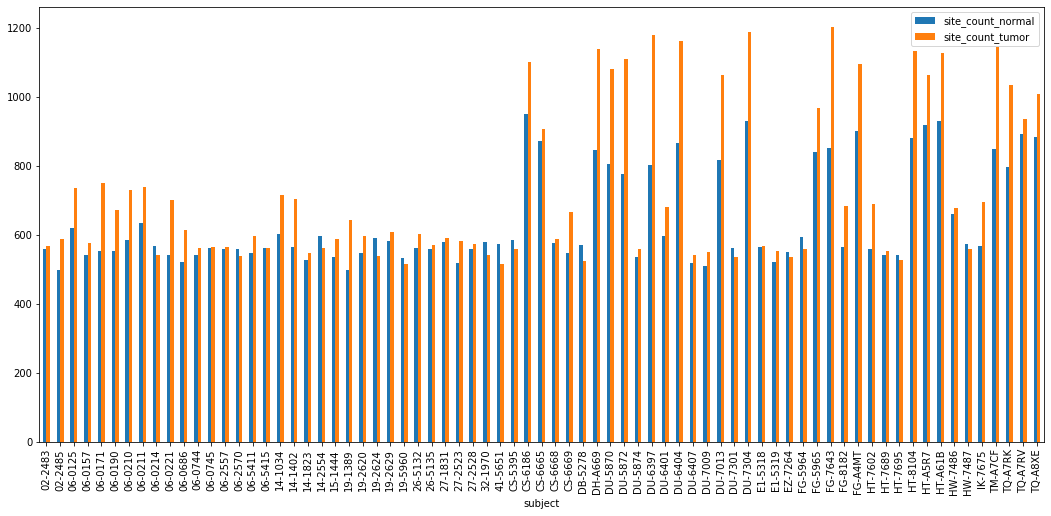

In [100]:
tmp.plot(kind='bar',y=['site_count_normal','site_count_tumor'])

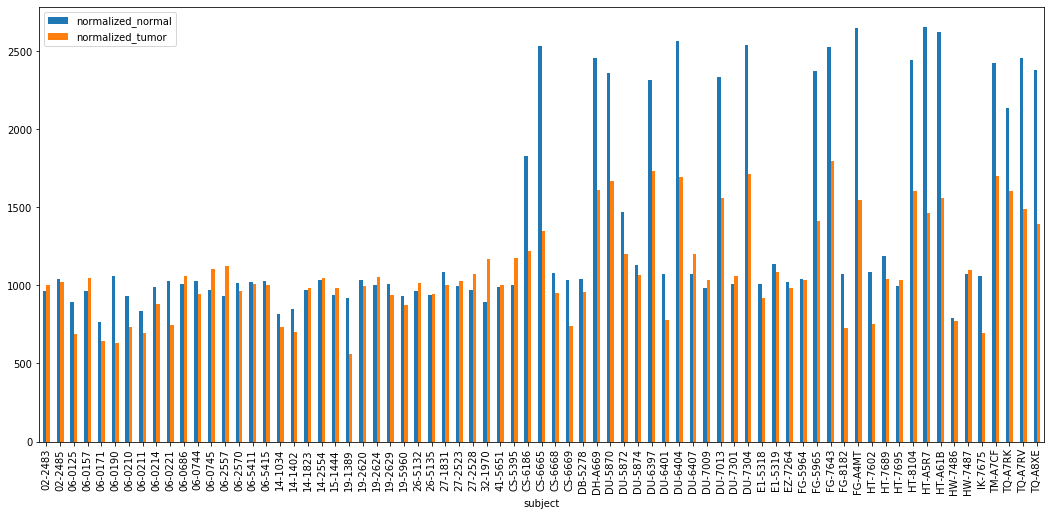

In [101]:
tmp.plot(kind='bar',y=['normalized_normal','normalized_tumor'])

# Transpose again

In [102]:
dftnt=dftn.T

In [103]:
dftnt.head()

sample               02-2483-01A  02-2483-10A  02-2485-01A  02-2485-10A  \
chromosome position                                                       
chr1       1409000      7.066832     3.452418     5.216842    16.706656   
           1410000      1.766708     5.178627     6.955789     0.000000   
           1580000      7.066832     5.178627     6.955789     0.000000   
           1581000      0.000000     0.000000     0.000000     0.000000   
           3751000      0.000000     0.000000     0.000000     0.000000   

sample               06-0125-01A  06-0125-10A  06-0157-01A  06-0157-10A  \
chromosome position                                                       
chr1       1409000      8.440648     4.314203     1.814758     1.780383   
           1410000      5.627099     1.438068     1.814758     0.000000   
           1580000      8.440648     7.190339     1.814758     7.121533   
           1581000      0.000000     0.000000     0.000000     0.000000   
           3751000      0.000000     0.000000     0.000000     0.000000   

sample               06-0171-01A  06-0171-10A  ...  IK-7675-01A  IK-7675-10A  \
chromosome position                            ...                             
chr1       1409000      2.562820     6.929330  ...     0.995888     3.743367   
           1410000      1.708547     2.771732  ...     3.983551     7.486735   
           1580000      3.417094     0.000000  ...     5.975327     5.615051   
           1581000      0.000000     0.000000  ...     0.000000     0.000000   
           3751000      0.000000     0.000000  ...     0.000000     0.000000   

sample               TM-A7CF-01A  TM-A7CF-10A  TQ-A7RK-01A  TQ-A7RK-10A  \
chromosome position                                                       
chr1       1409000      17.78652    14.274727    15.492079    13.408402   
           1410000       7.41105    11.419782     9.295248     0.000000   
           1580000      14.82210    11.419782    18.590495    13.408402   
           1581000       0.00000     0.000000     0.000000     0.000000   
           3751000       0.00000     2.854945     0.000000     0.000000   

sample               TQ-A7RV-01A  TQ-A7RV-10A  TQ-A8XE-01A  TQ-A8XE-10A  
chromosome position                                                      
chr1       1409000      9.574553    11.031846     6.901847    16.156597  
           1410000      4.787276     5.515923     6.901847    10.771065  
           1580000      9.574553    19.305730     2.760739    16.156597  
           1581000      0.000000     0.000000     0.000000     0.000000  
           3751000      0.000000     0.000000     0.000000     2.692766  

[5 rows x 147 columns]

In [104]:
#dftnt['normal_count']=dftnt.loc[:,
#    dftnt.columns.str.match('.*-10.$')][ dftnt.loc[:,dftnt.columns.str.match('.*-10.$')]>1 ].count(axis=1)

In [105]:
#dftnt['normal_count'].plot(kind='bar')

In [106]:
#dftnt['tumor_count']=dftnt.loc[:,
#    dftnt.columns.str.match('.*-01.$')][ dftnt.loc[:,dftnt.columns.str.match('.*-01.$')]>1 ].count(axis=1)

In [107]:
#dftnt['diff']=dftnt['normal_count']-dftnt['tumor_count']

In [108]:
#dftnt['diff']

In [109]:
#dftnt['diff'].plot(kind='bar')

In [110]:
#dftnt[(dftnt['diff']>5) | (dftnt['diff']<-5)]['diff'].plot(kind='bar')

In [111]:
initial_max_rows=pd.get_option('display.max_rows')

In [112]:
pd.set_option('display.max_rows', None)

In [113]:
#pd.DataFrame(index=dftnt[(dftnt['diff']>10) | (dftnt['diff']<-10)].index,data=dftnt[['diff','normal_count','tumor_count']])


In [114]:
pd.set_option('display.max_rows', initial_max_rows)

In [115]:
#df.loc[:,df.columns.str.match('.*-01.$')].shape

In [116]:
#tumor=df.loc[:,df.columns.str.match('.*-01.$')]

In [117]:
#tumor.shape

In [118]:
#df.loc[:,df.columns.str.match('.*-10.$')].shape

In [119]:
#normal=df.loc[:,df.columns.str.match('.*-10.$')]

In [120]:
#normal.shape

In [121]:
#normal[normal>0].count(axis=1)

In [122]:
#normal.loc[:,normal.loc['chr1',1409000]>0]

In [123]:
#tumor.loc[:,tumor.loc['chr1',1409000]>0]

In [124]:
#len(normal.loc[:,normal.loc['chr1',1409000]>0].columns)

In [125]:
#df['normal_count']=df.loc[:,
#    df.columns.str.match('.*-10.$')][ df.loc[:,df.columns.str.match('.*-10.$')]>0 ].count(axis=1)

In [126]:
#df['tumor_count']=df.loc[:,
#    df.columns.str.match('.*-01.$')][ df.loc[:,df.columns.str.match('.*-01.$')]>0 ].count(axis=1)

In [127]:
#df['diff']=df['normal_count']-df['tumor_count']

In [128]:
#df['diff']

In [129]:
#df['diff'].plot(kind='bar')

In [130]:
#df[(df['diff']>10) | (df['diff']<-10)]['diff'].plot(kind='bar')

In [131]:
print(pd.get_option('display.max_rows'))

60


In [132]:
pd.set_option('display.max_rows', None)

In [133]:
#pd.DataFrame(df[(df['diff']>10) | (df['diff']<-10)].index)

In [134]:
pd.set_option('display.max_rows', 60)